In [30]:
# General import
import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random


In [31]:
# Charger les données depuis la database
os.chdir("/Users/lalou/Desktop/DNA_Sequencing")
file = open("new_data.txt", 'r')
# file = open("data.txt", 'r')
lines = file.readlines()
file.close()


In [32]:
# Vecteurs contenant les donnees
l_used = len(lines)

seq = [line.strip().split(",")[0] for line in lines][0:l_used]
lab = [line.strip().split(",")[1] for line in lines][0:l_used]
labs = []
for i in lab:
    if i == "noise":
        labs.append(0)
    else:
        labs.append(1)

# Longueur de la plus longue séquence
m1 = max([len(i) for i in seq])


In [33]:
# Fonctions de transformation des donnees
def nucl_to_numb(letter):
    if letter == "A":
        return [1, 0, 0, 0]
    elif letter == "T":
        return [0, 1, 0, 0]
    elif letter == "G":
        return [0, 0, 1, 0]
    elif letter == "C":
        return [0, 0, 0, 1]
    else:
        print("aie", letter)
        return False
    
def seq_to_vec(sequence, l_max=m1):
    n = []
    for nucl in sequence:
        n.append(nucl_to_numb(nucl))
    while len(n) < m1:
        n.append([0.25, 0.25, 0.25, 0.25])
        # n.append([0.00, 0.00, 0.00, 0.00])
        # n.append([0.12, 0.12, 0.12, 0.12])
    return n

def vec_to_seq(array):
    n = ""
    for vec in array:
        if vec[0] == 1:
            n += "A"
        elif vec[1] == 1:
            n += "T"
        elif vec[2] == 1:
            n += "G"
        elif vec[3] == 1:
            n += "C"
        elif vec[0] == 0.25:
            return n
        else:
            print("aie")
    else:
        return n

In [34]:
# Randomisation
index = [i for i in range(len(seq))]
random.shuffle(index)
seq = [seq[i] for i in index]
labs = [labs[i] for i in index]


In [35]:
# Nom des classes
class_names = ['noise', 'gene']


In [36]:
# Configuration des couches
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2)])

# keras.layers.Dense(128, activation='relu'),

In [37]:
#  Compilation du modèle
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [38]:
print(m1)
nbre = 10
qtty = 1000
for i in range(nbre):
    start = i*qtty
    stop = (i+1)*qtty
    seqs = [seq_to_vec(j) for j in seq[start:stop]]
    array_seq = np.array(seqs)
    array_seq.reshape(-1, qtty, 4)
    array_lab = np.array(labs[start:stop])
    
    model.fit(array_seq, array_lab, epochs=1, batch_size=10)
    
    print("Avancée :", int(100*(i+1)/nbre), "%")
    
# Conversion en numpy Arrays
# seqs_array = np.array(seqs).reshape(-1,l_used,4)
# labs_array = np.array(labs)

# Entrainer le modele
# l_bis = int(0.9*l_used)
# model.fit(seqs_array[0:l_bis], labs_array[0:l_bis], epochs=5, batch_size=4)


14733
100/100 [==============================] - 3s 34ms/step - loss: 1.1579 - accuracy: 0.5180
Avancée : 10 %
100/100 [==============================] - 3s 33ms/step - loss: 0.7315 - accuracy: 0.5030
Avancée : 20 %
100/100 [==============================] - 3s 33ms/step - loss: 0.6939 - accuracy: 0.4850
Avancée : 30 %
100/100 [==============================] - 3s 33ms/step - loss: 0.6935 - accuracy: 0.5060
Avancée : 40 %
100/100 [==============================] - 3s 33ms/step - loss: 0.6933 - accuracy: 0.5150
Avancée : 50 %
100/100 [==============================] - 3s 33ms/step - loss: 0.6933 - accuracy: 0.5050
Avancée : 60 %
100/100 [==============================] - 3s 33ms/step - loss: 0.6926 - accuracy: 0.5140
Avancée : 70 %
100/100 [==============================] - 3s 33ms/step - loss: 0.6937 - accuracy: 0.5060
Avancée : 80 %
100/100 [==============================] - 3s 33ms/step - loss: 0.6932 - accuracy: 0.5070
Avancée : 90 %
100/100 [==============================] - 3s 33m

In [10]:
# Evaluer précision du modèle     
seqs = [seq_to_vec(j) for j in seq[nbre*qtty:]]
last_seqs = np.array(seqs)
last_seqs.reshape(-1, len(seq[nbre*qtty:]), 4)
last_labs = np.array(labs[nbre*qtty:])
test_loss, test_acc = model.evaluate(last_seqs,  last_labs, verbose=2)
# print('\nTest accuracy:', test_acc)


49/49 - 1s - loss: 0.6932 - accuracy: 0.5064


In [11]:
# Prédictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(last_seqs)
print(predictions[0], last_labs[0])


[0.5129816 0.4870184] 1


In [12]:
print(vec_to_seq(last_seqs[0]))

ATGACTGCGTTGCATAGTGTGTCCAAAACGCCCGCGATCAAGGAAGAGGAGGAGGACGGTGATGAGCGAGACGGCAGAGGAGTTCCCCTGGGACCAAGGAACCATGACTACCGTGGCAGGAAAGGTGATGAGGAAAGCGGTGCTGACACCGTGACATCTCCCATCACGTTTGAAAAGAAGAAGATAGCGCCCAGGGCGTCAACGCATTCCGAACAGAGTATTTTGAGCAGCATCTCATTGAAATCGATGGTAAATCAACATCGTCAGCAGCAGTTGCAGCAAGAGAGCTCAACAGGGGCAGGCACTGGGTTTGTTGACAGAAAGCAGCAGATCCAATCTCCGGCGATGGTGTCCATATTGAGGAAGAACTCTGCTGAGGAGAATGTTCGCAGCAGCCACAGTAGCAAGCTCGGTGAAGGGCAGATAGATGGTAGGAAGGCTTCTGCTAGTAAGGAGATCGGCAAGACGTTGCCATTCACGGATGACCAAAGATCGAACCCTGAACTAGATCCCACCAATAGCGTGGTGGATGTTAGCAGGGGCAAGAATACAAAGAGCAAAACTGTGTTCAATGAGTTAGAAGATGATGCCGATGACGATGACGAGGTTCGACAAAAGAATCTAACCACGCAGGCGTTACGCAAGTTGTCGTCGTTCAAAATGAATGCTAGTTCTAATTTGAGGTTGAGTAAAGAAAACAAGGCGAAAGAGTCTTCATCTTCGTCCACGTCTTCAGTGTCGTCATCGTCGACGTCGAAGGTGGAAAATATTGTCGACAAGCTGACTACAACGAATTCTAGCTCGATGTCCCAACTGCGGTTTGGCAACACGAACGTCATTATTGATTCGGTGAATCATGCGGCGAAACCGCCGCATCAGCAGATGCTAAGGAAACCCTCGCTGGAATTTTTACCGCAGCCTGCTTCGAGCACTAATCTGAATTTTAATTCCAATAAACATAAATCAAATGTAAGACAGATCAGTAACCCTAAAAAACCGC

In [13]:
# Voir les prédictions

results = [[vec_to_seq(last_seqs[i]), last_labs[i], predictions[i][last_labs[i]]] for i in range(len(predictions))]

false = []
true = [x if x[2] > 0.5 else false.append(x) for x in results]
while None in true:
    true.remove(None)
    
f_len = [[len(i[0]), i[1]] for i in false]
t_len = [[len(i[0]), i[1]] for i in true]


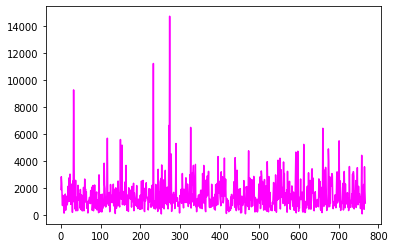

768 / 1556  : badly predicted sequences
0 / 768  : gene predicted while orf (orange)
768 / 768  : orf predicted while gene (magenta)


In [14]:
lenf = [i[0] for i in f_len]
labf = [i[1] for i in f_len]
lf1, lf2 = [], []
for i in range(len(labf)):
    if labf[i] == 0:
        lf1.append(lenf[i])
    else:
        lf2.append(lenf[i])

plt.figure("False Predictions")
plt.plot(lf1, color='orange')
plt.plot(lf2, color='magenta')
plt.show()
print(len(f_len), "/", len(results), " : badly predicted sequences")
print(len(lf1), "/", len(lenf), " : gene predicted while orf (orange)")
print(len(lf2), "/", len(lenf), " : orf predicted while gene (magenta)")

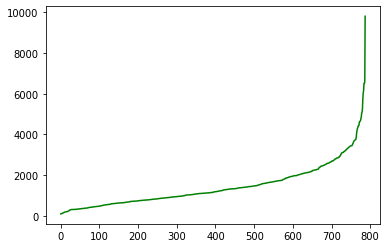

788 / 1556  : well predicted sequences
   -->  788  : well predicted orf (green)
   -->  0  : well predicted gene (blue)


In [15]:
lent = [i[0] for i in t_len]
labt = [i[1] for i in t_len]
lt1, lt2 = [], []
for i in range(len(labt)):
    if labt[i] == 0:
        lt1.append(lent[i]) # orfs
    else:
        lt2.append(lent[i]) # genes

plt.figure("True Predictions")
plt.plot(sorted(lt1, reverse=False), color='green')
plt.plot(sorted(lt2, reverse=True), color='blue')
plt.show()
print(len(t_len), "/", len(results), " : well predicted sequences")

print("   --> ", len(lt1), " : well predicted orf (green)")
print("   --> ", len(lt2), " : well predicted gene (blue)")

# print(len(lt1), "/", len(lent), " : well predicted orf (green)")
# print(len(lt2), "/", len(lent), " : well predicted gene (blue)")

In [16]:
model.summary()

print(model.trainable_variables) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 58932)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               7543424   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 7,543,682
Trainable params: 7,543,682
Non-trainable params: 0
_________________________________________________________________
[<tf.Variable 'dense/kernel:0' shape=(58932, 128) dtype=float32, numpy=
array([[-0.01358909, -0.01471287, -0.01023279, ..., -0.01524006,
        -0.00123748, -0.00389672],
       [-0.00594242,  0.00086492, -0.00400277, ...,  0.00174975,
        -0.00972827, -0.0048597 ],
       [-0.00418846,  0.00285257,  0.0007002 , ..., -0.00273133,
         0.0041378 ,  0.00165875],
    

In [17]:
print(sum(labs), len(labs))
print(round(100*sum(labs)/len(labs), 2), "%")

5778 11556
50.0 %


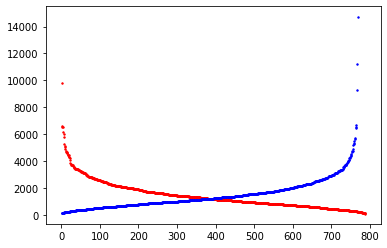

In [18]:
lo = lt1 + lf1
lg = lt2 + lf2
plt.scatter([i+1 for i in range(len(lo))], sorted(lo, reverse=True), color="red", alpha=1, s=2)
plt.scatter([i+1 for i in range(len(lg))], sorted(lg, reverse=False), color="blue", alpha=1, s=2)

In [19]:
c = 0
s1 = 0
s2 = 0
for i in predictions:
    print(i)
    c += 1
    if i[0] > i[1]:
        s1 += 1
    elif i[0] < i[1]:
        s2 += 1
    else:
        print("Waow")
print(c, s1, s2)

[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816

[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816 0.4870184]
[0.5129816

In [20]:
sequencs = [vec_to_seq(i) for i in last_seqs]
for i in range(len(sequencs)):
    if sequencs[i] in sequencs[i+1:]:
        print(i)


365


In [39]:
d_genes = {}
d_orfs = {}
for i in range(len(seq)):
    if labs[i] == 0:
        if len(seq[i]) in d_orfs:
            d_orfs[len(seq[i])].append(seq[i])
        else:
            d_orfs[len(seq[i])] = [seq[i]]
    else:
        if len(seq[i]) in d_genes:
            d_genes[len(seq[i])].append(seq[i])
        else:
            d_genes[len(seq[i])] = [seq[i]]

In [42]:
def count(s1, s2):
    l = len(s1)
    c = 0
    for i in range(l):
        if s1[i] == s2[i]:
            c += 1
    return c/l
        
k = 0
for key in d_orfs:
    if key not in d_genes:
        continue
    for i in d_orfs[key]:
        for j in d_genes[key]:
            if count(i, j) > 0.9:
                print(key, "\n", count(i, j), "\n \n")
                k += 1
print(k)
                
l = 0
for key in d_orfs:
    l+=len(d_orfs[key])
for key in d_genes:
    l+=len(d_genes[key])
print(l)

6504 
 1.0 
 

14733 
 1.0 
 

7107 
 1.0 
 

6438 
 1.0 
 

4740 
 1.0 
 

3681 
 1.0 
 

6372 
 1.0 
 

4569 
 1.0 
 

7887 
 1.0 
 

3717 
 1.0 
 

4536 
 1.0 
 

4308 
 1.0 
 

6837 
 1.0 
 

3513 
 1.0 
 

4383 
 1.0 
 

4419 
 1.0 
 

4980 
 1.0 
 

5409 
 1.0 
 

5628 
 1.0 
 

5853 
 1.0 
 

5391 
 1.0 
 

5391 
 1.0 
 

5391 
 1.0 
 

5391 
 1.0 
 

5391 
 1.0 
 

5391 
 1.0 
 

5391 
 1.0 
 

5391 
 1.0 
 

5391 
 1.0 
 

6588 
 1.0 
 

4545 
 1.0 
 

6030 
 1.0 
 

3687 
 1.0 
 

7425 
 1.0 
 

4104 
 1.0 
 

3366 
 1.0 
 

3366 
 1.0 
 

4509 
 1.0 
 

4509 
 1.0 
 

8877 
 1.0 
 

9279 
 1.0 
 

5787 
 1.0 
 

4548 
 1.0 
 

3456 
 1.0 
 

6432 
 1.0 
 

4779 
 1.0 
 

4779 
 1.0 
 

5862 
 1.0 
 

6702 
 1.0 
 

7242 
 1.0 
 

3852 
 1.0 
 

9807 
 1.0 
 

5046 
 0.9980182322631788 
 

7470 
 1.0 
 

5904 
 1.0 
 

4614 
 1.0 
 

4557 
 1.0 
 

4986 
 1.0 
 

6327 
 1.0 
 

8247 
 1.0 
 

4674 
 1.0 
 

5112 
 1.0 
 

3498 
 1.0 
 

8019 
 1.0 
 

6696 
 1.0 
 

3825 
 1.